<a href="https://colab.research.google.com/github/ChrysKoum/NASA-Space-Apps-Challenge-2023/blob/main/Programs/MR_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
def load_data(filename):
    data = pd.read_csv(filename, sep="\s+", header=0)
    data['Time'] = pd.to_datetime(data[['Year', 'Month', 'day', 'Hour','Minute']])
    data = data.drop_duplicates()
    return data


In [27]:
def MR_analysis(data, column_name, window_size=15, cool_down_period=60, color_map=None):
    # Apply changes to data
    data[f'{column_name}_change'] = data[column_name].diff().apply(lambda x: 1 if x != 0 else 0)
    data[f'{column_name}_smoothed'] = data[column_name].rolling(window=window_size).mean()

    # Calculate the 99th percentile of the smoothed Bz component for the upper threshold
    # and 1st percentile for the lower threshold
    if column_name=='Bz':
      upper_powerful_threshold = data[f'{column_name}_smoothed'].quantile(0.99)
      lower_powerful_threshold = data[f'{column_name}_smoothed'].quantile(0.01)
      data[f'{column_name}_potential_MR'] = data[f'{column_name}_smoothed'].apply(lambda x: 1 if x > upper_powerful_threshold or x < lower_powerful_threshold else 0)  # Identify powerful MR events
    else:
      upper_powerful_threshold = data[f'{column_name}_smoothed'].quantile(0.98)
      data[f'{column_name}_potential_MR'] = data[f'{column_name}_smoothed'].apply(lambda x: 1 if x > upper_powerful_threshold  else 0)  # Identify powerful MR events



    last_event_index = None
    for idx, row in data.iterrows():
        if last_event_index is not None and (idx - last_event_index) < cool_down_period:
            data.at[idx, f'{column_name}_potential_MR'] = 0
        elif row[f'{column_name}_potential_MR'] == 1:
            last_event_index = idx

    count_ones = data[f'{column_name}_potential_MR'].sum()

    # Print the count
    print(f'Number of potential MR: {count_ones}')
    # Plotting
    plt.figure(figsize=(15, 7))
    plt.plot(data['Time'], data[f'{column_name}_smoothed'], label=f'Smoothed {column_name} Component', color=color_map[column_name], alpha=0.8)
    plt.axhline(y=upper_powerful_threshold, color='black', linestyle='-.', linewidth=1.2, label=f'Upper {column_name} Threshold')
    if column_name=='Bz':
      plt.axhline(y=lower_powerful_threshold, color='black', linestyle='-.', linewidth=1.2, label=f'Lower {column_name} Threshold')
    plt.title(f'Smoothed {column_name} Component with Potential MR Events Highlighted (With Cool-down)')
    plt.xlabel('Time Index')
    plt.ylabel(f'{column_name} Value')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    data.drop([f'{column_name}_change', f'{column_name}_smoothed'], axis=1)

    return data


Number of potential MR: 263


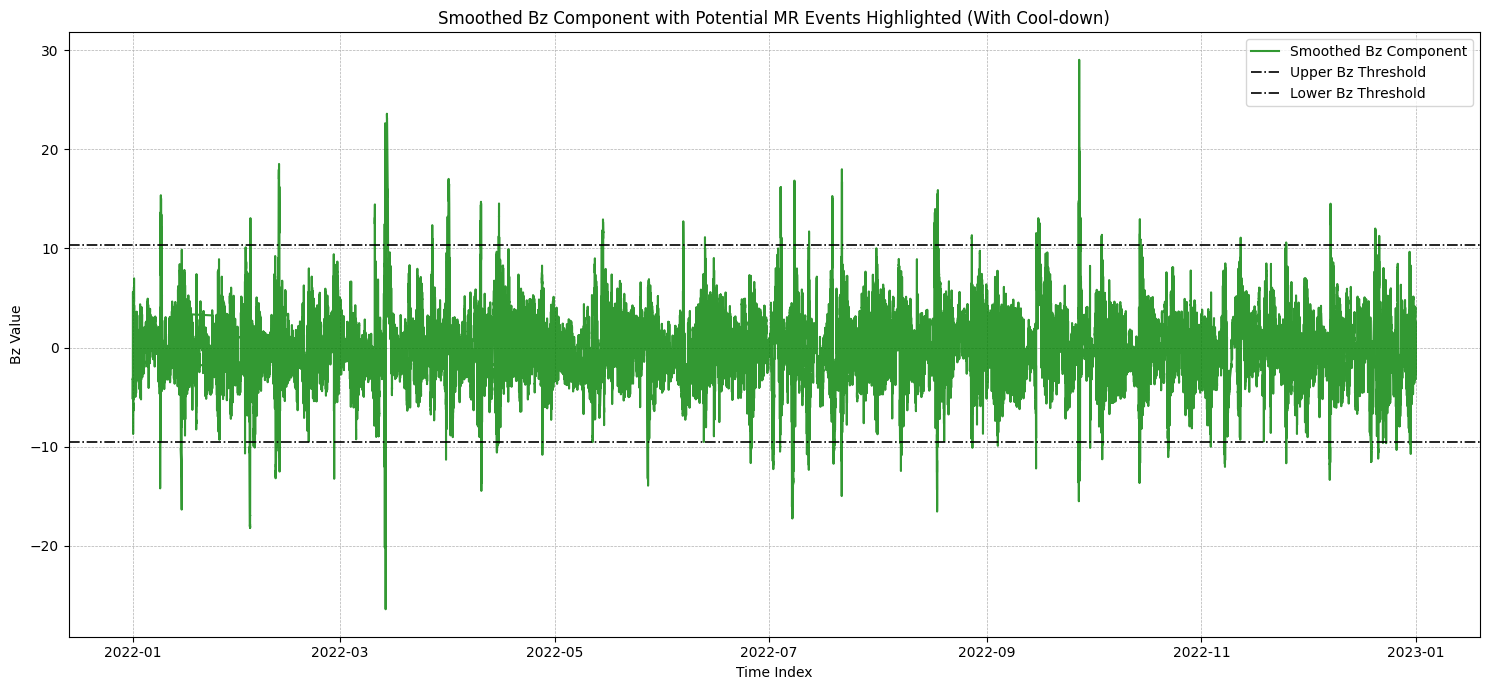

Number of potential MR: 241


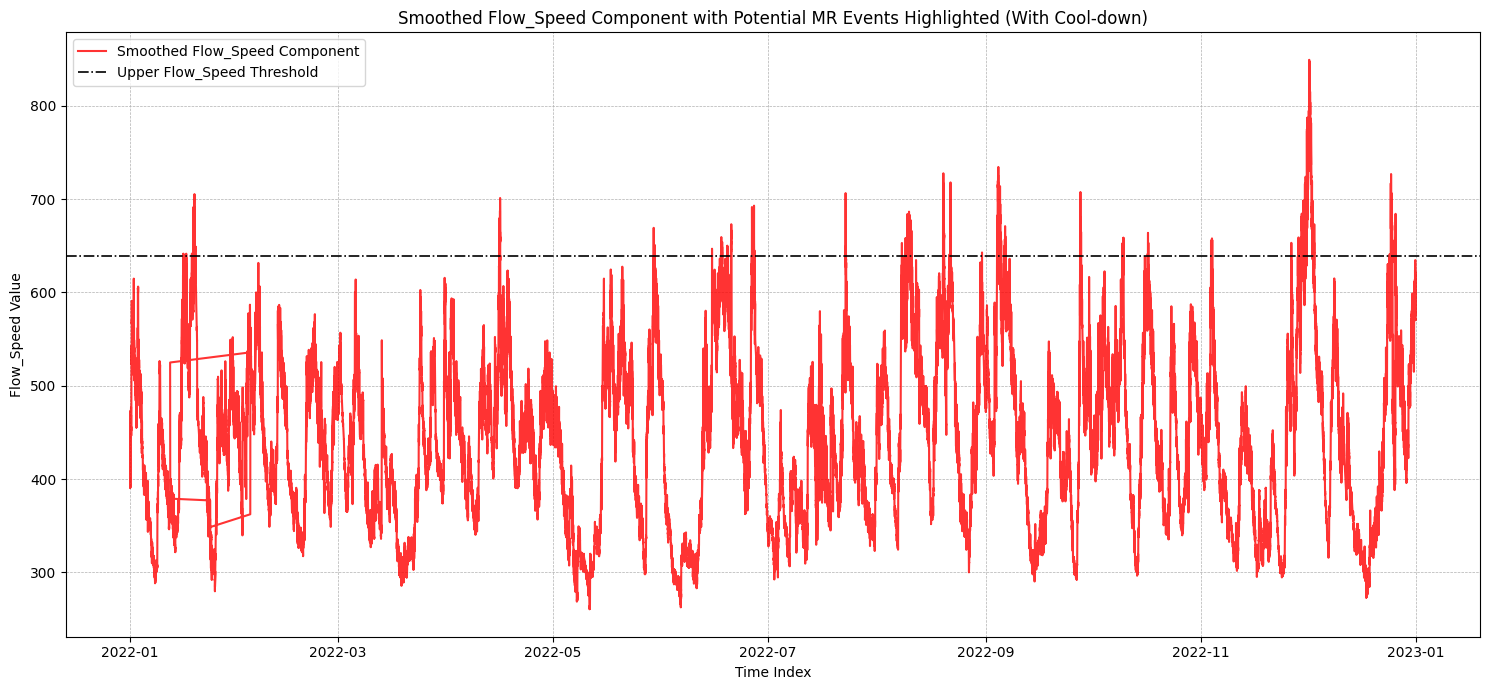

Number of potential MR: 224


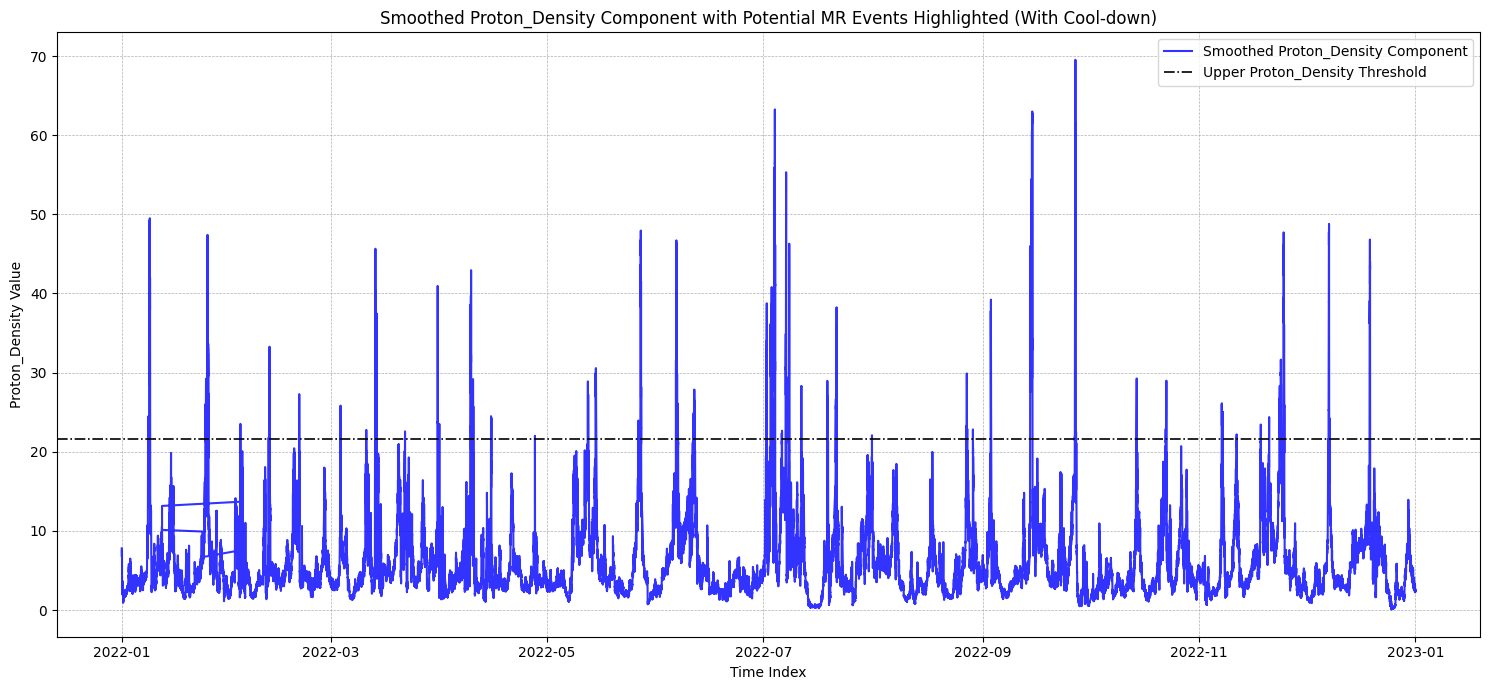

Number of potential MR: 278


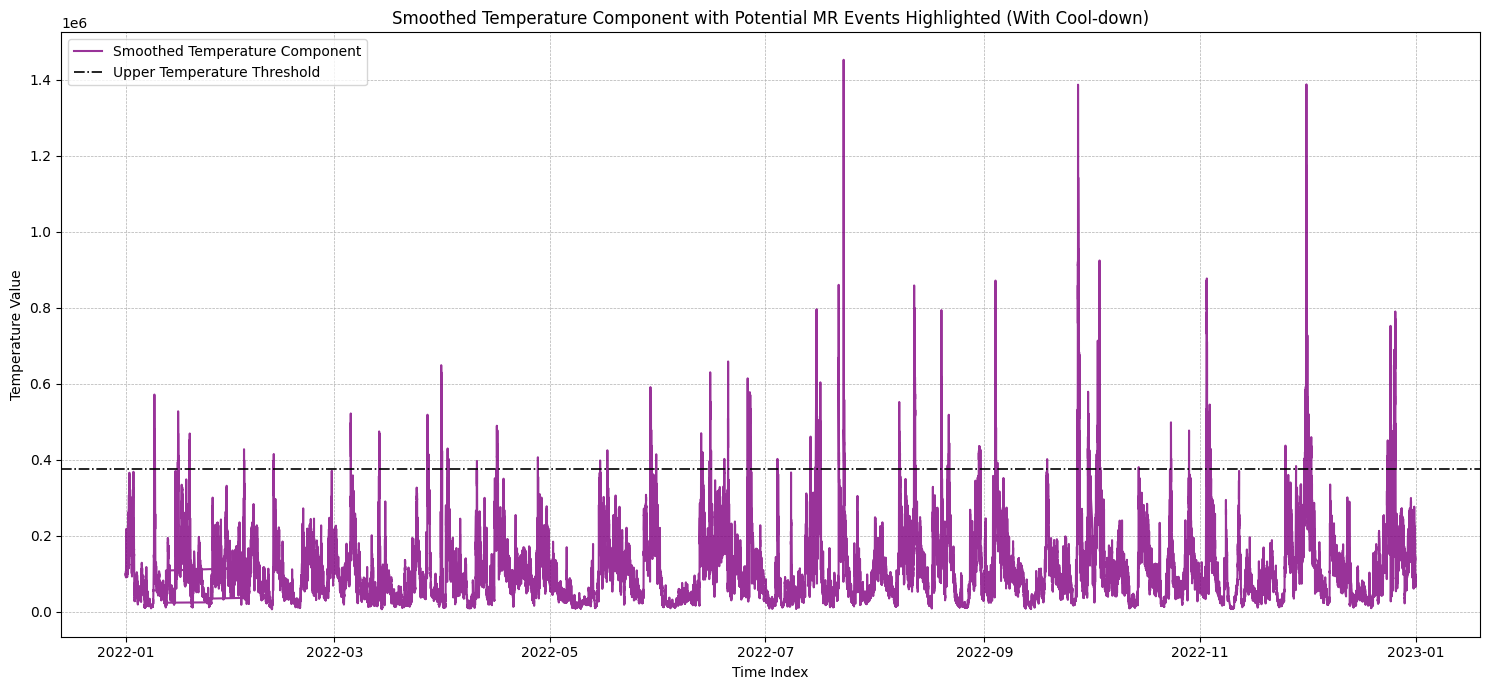

In [28]:

filename = "wind_def_2022_clean_month_plus.txt"
data = load_data(filename)

color_map = {
        'Bz': 'green',
        'Flow_Speed': 'red',
        'Proton_Density': 'blue',
        'Temperature': 'purple'
    }

# Process and plot for each variable
for column in ['Bz', 'Flow_Speed', 'Proton_Density', 'Temperature']:
  data=MR_analysis(data, column, color_map=color_map)

In [30]:
data

,Year,Hour,Minute,Bx,By,Bz,Flow_Speed,Proton_Density,Temperature,Month,...,Bz_potential_MR,Flow_Speed_change,Flow_Speed_smoothed,Flow_Speed_potential_MR,Proton_Density_change,Proton_Density_smoothed,Proton_Density_potential_MR,Temperature_change,Temperature_smoothed,Temperature_potential_MR
0,2022,0,0,-4.3,3.9,-3.6,396.5,8.1,96453.0,1,...,0,1,NaN,0,1,NaN,0,1,NaN,0
1,2022,0,1,-4.1,3.9,-3.8,397.8,8.1,98453.0,1,...,0,1,NaN,0,0,NaN,0,1,NaN,0
2,2022,0,2,-4.3,3.9,-3.6,397.8,8.1,98453.0,1,...,0,0,NaN,0,0,NaN,0,0,NaN,0
3,2022,0,3,-4.5,3.8,-3.4,395.6,7.9,93045.5,1,...,0,1,NaN,0,1,NaN,0,1,NaN,0
4,2022,0,4,-4.4,3.9,-3.5,393.3,7.7,87638.0,1,...,0,1,NaN,0,1,NaN,0,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527035,2022,23,55,-4.3,3.0,0.7,569.6,2.9,86049.0,12,...,0,1,572.406667,0,1,2.533333,0,1,77124.133333,0
527036,2022,23,56,-3.9,3.6,-0.0,573.9,2.7,77893.0,12,...,0,1,571.793333,0,1,2.526667,0,1,76449.733333,0
527037,2022,23,57,-3.1,3.9,0.5,586.3,2.9,90625.0,12,...,0,1,572.353333,0,1,2.566667,0,1,77316.266667,0
527038,2022,23,58,-4.2,2.8,-0.2,563.3,2.3,54870.0,12,...,0,1,571.353333,0,1,2.566667,0,1,75571.400000,0


# Occurences of Magnetic Reconnections per month in 2022 and mean value

In [42]:
mo=0
for i in range(1,13):
  datamonth=data[data['Month']==i]
  count_ones = datamonth['Bz_potential_MR'].sum()
  mo=mo+count_ones
  print(count_ones)
mean=mo/12
print(mean)

12
29
38
19
9
9
49
18
26
16
10
28
21.916666666666668
